# Random numbers

Monte Carlo methods heavily rely on random numbers. Classical computers can only execute deterministic operations. In particular they cannot be used to generate stochastic quantities like random variables. However it is possible to design deterministic algorithms capable to generate series of number that, to some extent, resemble random numbers. In practical applications a large number of random numbers is required. It is therefore essential of being able to generate good quality random numbers efficiently. This is not such an easy task!

Discussing all the practical and theoretical issues involved is beyond the scope of this introduction and we will rely on NumPy's built-in functions.

To avoid confusion, let's recall a couple of definitions:

- The **cumulative distribution function** $F(x)$ of a random process measures the probability for the outcome of an event to have a value less than or equal to $x$. Obviously we should have $F(x\rightarrow -\infty)=0$ and $F(x\rightarrow \infty)=1$.

- The **probability distribution function** measures how likely the outcome of an event "will be close" to $x$. More precisely, it is defined as the derivative of the cumulative distribution,
$$
p(x)=\frac{dF}{dx}(x)\Leftrightarrow F(x)=\int_{-\infty}^x p(y)dy.
$$
In other words, for small $\Delta x$, $p(x)\Delta x$ represents the probability for the event to have a value lying between $x$ and $x+\Delta x$.

## Uniform random distribution

The most basic distribution function is the uniform distribution. It describes a sequence of random numbers that are distributed in a given interval $[a,b]$ with equal probability. As $p(x)$ is a constant in the interval $[a,b]$ and $\int_{-\infty}^{\infty} p(x)dx = 1$, one has,
$$
p(x) = 
\begin{cases} \frac{1}{b-a} &\mbox{if } x\in [a,b] \\ 
0 & \mbox{otherwise } 
\end{cases} 
$$

Let us see how to produce such a distribution using Python. As usual, we first import a few libraries.

In [3]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:
# Let's draw one random number
x = numpy.random.random_sample()
print(x)

0.5785162181783815


If you execute the above piece of code several times, you will notice that each time you will get a different number from 0 to 1. As the function `numpy.random.random_sample()` samples uniformly between 0 and 1, all the numbers in this interval have equal probabilities of being chosen (note that 0 is a possible output while 1 is excluded; one says that the numbers are drawn in the interval [0,1) instead of [0 1]). 

If you know in advance how many random numbers you would like to draw, you may also specify this as an option and `numpy.random.random_sample()` will return an appropriately sized array:

In [5]:
# We draw ten random numbers
x = numpy.random.random_sample(10)
print(x)

[0.26869542 0.08777577 0.41559588 0.53224522 0.95244758 0.07765321
 0.29070395 0.84782814 0.66801368 0.68497838]


### Are the numbers really random?

You may wonder how your computer is able to draw these random numbers and if they are really random. In fact, they are not. As we anticipated above, the internal algorithm produces a perfectly repeatable sequence of numbers that only look like random. In particular, after a (very) large number of draws, the sequence will repeat itself.

When you start Python (through the notebook for example), the system picks a starting place in the sequence and then produces all the following numbers in the sequence at each call of the `numpy.random.random_sample()` function. You may however pick the starting place in the sequence yourself and therefore draw a perfectly reproducible set of numbers. This is done by specifying the so-called 'seed' of the generator like this:

In [6]:
numpy.random.seed(0)
x = numpy.random.random_sample(10)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


If you repeat the above piece of code several times, you will observe that the floats returned are always identical! The seed, 0 in this case, is an integer that fixes a starting place in the sequence of "pseudo-random" numbers. Choose a different value for the seed and see what happens.

Now try the following code:

In [7]:
numpy.random.seed(0)
x = numpy.random.random_sample(5)
print(x)
x = numpy.random.random_sample(5)
print(x)


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]


Compare this to the previous 10 numbers generated (with seed=0). Do you see what is happening?

Setting the seed of the random number generator can be very useful if you want to debug a code and have a repeatable output. However, when you perform a real computation, you should let the system pick a seed at random based on the date and time for example. This is done each time python starts but you may also do it yourself by calling `numpy.random.seed()` without any argument.

### Uniform distribution in the interval [a,b)

Producing a sample of random numbers in the interval [a,b) instead of just [0,1) is easy. It is achieved by first drawing the numbers between 0 and 1 and then 'rescaling' the output:

In [8]:
a=5
b=20
x = numpy.random.random_sample(10000000)
y = (b-a)*x+a
print(y)

[16.87587557 12.9334238  13.52066842 ... 17.33177938 19.624699
  9.94947497]


## Visualising the histogram of the random sample

Our little code above is designed to return a sample of numbers between 5 and 20 with equal probability and one therefore speaks of a uniform random distribution. A nice way of checking this consists in plotting the histogram of the random numbers generated. In a histogram, the interval of interest is first divided into smaller intervals called bins. For each bin, the histogram displays the number of occurances of the random sequence that have a value within the bin. Let's try it:

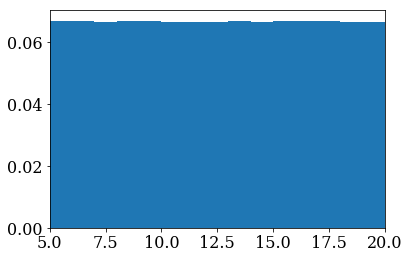

In [9]:
binwidth=1
pyplot.xlim(5,20)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),density=True);

By examining the histogram you should be able to confirm how many random numbers drawn above fall in each bin (in this case we have created bins that span the intervals [i,i+1) where i are the integers between 5 and 19).

Of course, the above histogram is far from uniform; we only drew 10 random numbers so there was no chance of having the same number of occurances in each bin (we have 15 of them!). The distribution will only appear uniform if we draw a large amount of random numbers and the fluctuations in the histogram are smoothed out. Try it, redraw the histogram for 10000, or even 1000000 random numbers. 

Finally, you should draw the histogram with the option 'normed=True'. That way, all the values computed will be divided by the total number of random numbers drawn and provide the frequency of obtaining a random number in any given bin. As you increase the size of your random numbers sample and decrease the size of the bins, this frequency converges to the probability distribution function of the random numbers. Does it work?

## Generation of other random distributions

Although the uniform distribution is useful in many applications, one ofter requires the random numbers to be distributed according to another distrubtion. 

Two examples are the Gaussian distribution,

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$
where $\mu$ is the mean of the distribution and $\sigma$ its standard deviation, or the exponential distribution,

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

where $\alpha$ is the rate parameter. Many other distributions are useful and interesting.

### Invertible distributions

When the cumulative distribution function F is known and can be explicitely inverted, it is easy to produce the corresponding random generator using a uniform random generator in $[0, 1]$.

Indeed, if the random process $X$ is distributed according to the uniform distribution we have $P(X<x)=U(x)$ with,
$$
U(x)=
\begin{cases} 
0 &\mbox{if } x<0 \\
x &\mbox{if } x\in [0,1] \\ 
1 &\mbox{if } x>1
\end{cases} 
$$

Say we want to generate a set of random numbers $Y$ for which the cumulative distribution is $F$. The trick to construct the set $Y$ is to apply $F^{-1}$ to the set $X$ since we then have,

\begin{align}
P(Y<y) &= P(F^{-1}(X)<y) \nonumber \\
&= P(X<F(y)) \nonumber \\
&= U(F(y)) \nonumber \\
&= F(y)\nonumber
\end{align}

The last equality shows that $Y$ has the required cumulative distribution function.

For example, take the exponential distribution. The cumulative distribution function is,
$$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

For $x\in [0, 1]$, the inverse of this distribution is thus,

$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

Let's see if that works.

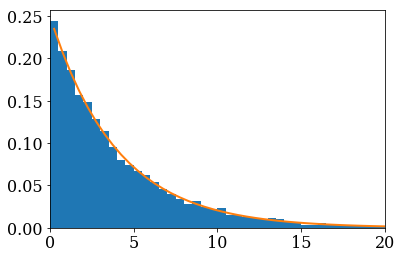

In [10]:
numpy.random.seed(0)

alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(10000)
y_exp = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y_exp,bins,density=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


What do you think?

### Von Neumann rejection method

In this method, one generates a set of random numbers with a given distribution $p_1(x)$, and then cleverly extracts from it a subset that obeys the desired distribution $p_2(x)$. In order for the method to work, there must exist a constant K such that we have, 

$$
{p_2(x)}\leq {Kp_1(x)},\quad \forall x.
$$

As an example, let us try to produce a set of numbers distributed according to the positive Gaussian distribution (meaning we only want positive numbers). For that purpose, we may use the exponential distribution (with rate parameter $\alpha =1$) as the starting distribution. Indeed, from the plot below, we see that the above criteria is met with $K=1.4$ ($K$ could have even been chosen a bit smaller).

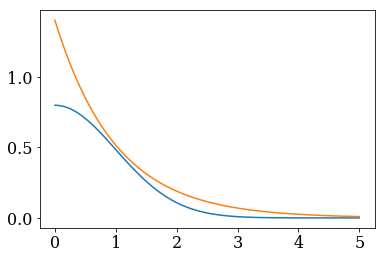

In [11]:
nx=100

xi =numpy.linspace(0,5,nx)

f1=2*numpy.exp(-xi**2/2.0)/numpy.sqrt(2*numpy.pi)
f2= 1.4*numpy.exp(-numpy.abs(xi))

pyplot.plot(xi,f1)
pyplot.plot(xi,f2)

The algorithm works as follows. 

1. We generate a number $x$ according to the exponential distribution.
2. We draw a random number $U$ between 0 and 1
3. We keep the number $x$ in our final set of randoms numbers if $U<\frac{p_2(x)}{Kp_1(x)}$.

The third step is the clever part. Imagine we draw a total of $N$ random numbers distributed according to $p_1$. In such a set, the number of times we observe a value $x_1$ in an interval $\Delta x$ centered around $x_1$ is about:

$$
n(x_1)\approx N p_1(x_1)\Delta x
$$

Because of step 3 this number will be reduced to

$$
n_f(x_1) \approx n(x_1) \frac{p_2(x_1)}{Kp_1(x)} = N\frac{p_2(x_1) \Delta x}{K}
$$

in the final set of random numbers. This implies that in this final set, the proportion of numbers centered around two values $x_1$ and $x_2$ is given by,

$$
\frac{n_f(x_1)}{n_f(x_2)}=\frac{p_2(x_1)}{p_2(x_2)}.
$$

We thus conclude that the resulting set of random numbers is indeed distributed according to $p_2$. Because of the step 3, we are systematically rejecting numbers from the initial sequence and the size $N_f$ of the final sequence is necessarilly smaller than the initial one ($N_f\approx N/K$). Therefore we should carefully choose $p_1$ so that $K$ can be made as small as possible.

Enough background, let us try the algorithm and see if it works as expected:

Size of accepted set h and expected size 1/K: 7113 7142.857142857143


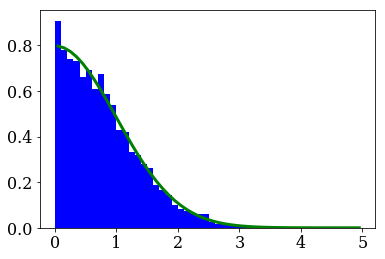

In [12]:
# Number of random numbers to draw according to p1 
N = 10000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),density=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


Not bad! The algorithm produces the proper distribution and the final set has approximately the expected size. 

There are of course many ways to implement the Von Neumann rejection method. Here is another more efficient one making use of the `numpy.extract` method:

Acceptance ratio: 0.7202


/Users/Noe/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


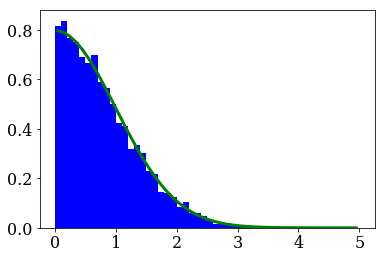

In [13]:
numpy.random.seed(0)
mu = 0.0
sigma = 1

# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)


# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
acc_ratio = h.size/g.size
print("Acceptance ratio:",acc_ratio)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



## Challenge

**1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.**


Commençons par comparer la méthode précédemment implémentée pour la loi de **décroissance exponentielle** avec un générateur provenant de la bilbiothèque numpy: *numpy.random.exponential($\beta$, size)*.

[ 0.75235713 -1.36013545  9.06693962 ...  2.01839796  3.79535856
  3.95344445]


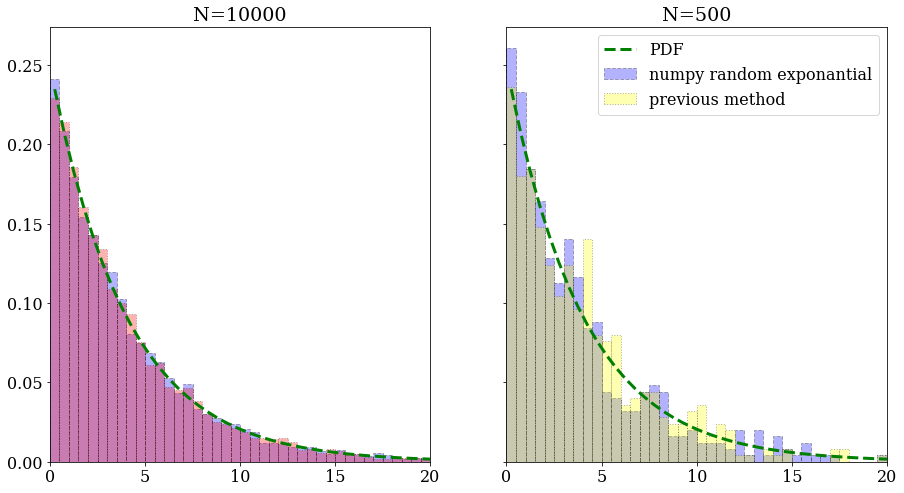

In [14]:
beta = 4 # scale parameter of the exponential distribution
N1 = 10000
N2 = 500

x_exp = numpy.random.exponential(scale=beta, size=N1)
x_exp2 = numpy.random.exponential(scale=beta, size=N2)

r = numpy.random.random_sample(N1)
y_exp = -1/alpha*numpy.log(1-r)

r2 = numpy.random.random_sample(N2)
y_exp2 = -1/alpha*numpy.log(1-r2)

# Bins parameters
binwidth=0.5
bins=numpy.arange(0.,21., binwidth)

# Plot
fig, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True, figsize=(15,8))

ax1.hist(x_exp,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'b', label='numpy random exponantial');
ax1.hist(y_exp,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.3, lw=1, color= 'r', label='previous method');
ax1.set_xlim(0,20)

ax2.hist(x_exp2,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'b', label='numpy random exponantial');
ax2.hist(y_exp2,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.3, lw=1, color= 'yellow', label='previous method');
ax2.set_xlim(0,20)

print(x_exp-y_exp)

# Compute centers of bins
xc = bins[:-1] + binwidth/2

# Plot the analytical pdf
for ax in (ax1, ax2):
    ax.plot(xc,(1/beta)*numpy.exp(-xc/beta), lw=3, color='g', ls='dashed', label='PDF')


ax1.set_title('N=%.0f' %N1)
ax2.set_title('N=%.0f' %N2)
    
pyplot.legend(prop={'size':16})
pyplot.show()

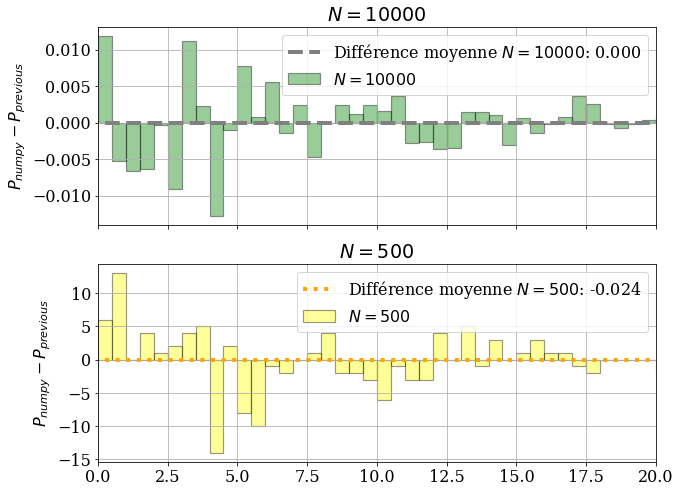

In [15]:
hist_x_exp = numpy.histogram(x_exp, bins=bins, density=True)
H_x_exp = hist_x_exp[0]
hist_y_exp = numpy.histogram(y_exp, bins=bins, density=True)
H_y_exp = hist_y_exp[0]

hist_x_exp2 = numpy.histogram(x_exp2, bins=bins)
H_x_exp2 = hist_x_exp2[0]
hist_y_exp2 = numpy.histogram(y_exp2, bins=bins)
H_y_exp2 = hist_y_exp2[0]


fig, (ax1, ax2) = pyplot.subplots(2, 1, sharex=True, figsize=(10,8))

ax1.bar(bins[:-1]+0.25, 
         height=(H_x_exp-H_y_exp), edgecolor='black', 
         linewidth=1.2, alpha = 0.4, width = binwidth, color='green',
          label = '$N=%.0f$' %N1) 
diff_N1_av = numpy.average(H_x_exp-H_y_exp)
ax1.plot([-5, 28], [diff_N1_av, diff_N1_av],
           ls='--', lw=4, color='gray',
           label = 'Différence moyenne $N=%.0f$: %.3f' %(N1, diff_N1_av))

ax1.grid()
ax1.legend()
ax1.set_title('$N=%.0f$' %N1)
ax1.set_ylabel(r'$P_{numpy}-P_{previous}$')

ax2.bar(bins[:-1]+0.25, 
         height=(H_x_exp2-H_y_exp2), edgecolor='black', 
         linewidth=1.2, alpha = 0.4, width = binwidth, color='yellow',
          label = '$N=%.0f$' %N2) 
diff_N2_av = numpy.average(H_x_exp2-H_y_exp2)
ax2.plot([-5, 28], [diff_N2_av, diff_N2_av],
           ls=':', lw=4, color='orange',
           label = 'Différence moyenne $N=%.0f$: %.3f' %(N2, diff_N2_av))

ax2.grid(True)
ax2.legend()
ax2.set_title('$N=%.0f$' %N2)
ax2.set_ylabel(r'$P_{numpy}-P_{previous}$')

fig.canvas.set_window_title('Window Title')
pyplot.xlim(0,20)
pyplot.legend()
pyplot.show()

On remarque des résultats relativement similaires, correspondant tous deux bien à la PDF que l'on souhaite reproduire.

Le plot précédent souligne la similitude des données générées en montrant la différence en probabilités (%) du nombre de données générées par boîtes dans le graphique qui précède. Dans les deux cas, on voit que cette valeur est en moyenne nulle et que la différence devient beaucoup plus faible lorsque $N$ augmente (cf. l'échelle vertical est environ divisée par $10^3$, toutefois ces grandeurs varient puisqu'elles sont issues d'un processus aléatoire).

On regarde alors si la différence est liée à la générération de nombres aléatoires, et donc à la graine (*seed*):

[0. 0. 0. ... 0. 0. 0.]


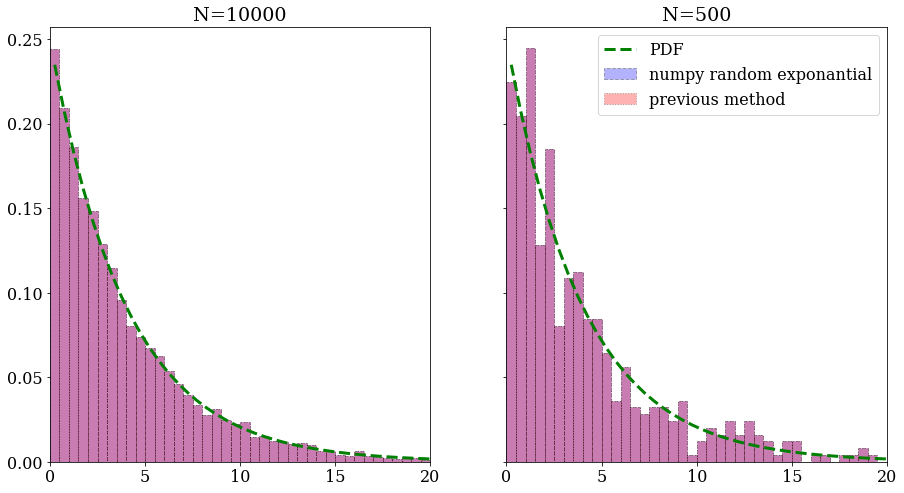

In [16]:
numpy.random.seed(0)

beta = 4 # scale parameter of the exponential distribution
N1 = 10000
N2 = 500

numpy.random.seed(0)
x_exp = numpy.random.exponential(scale=beta, size=N1)
numpy.random.seed(0)
x_exp2 = numpy.random.exponential(scale=beta, size=N2)

numpy.random.seed(0)
r = numpy.random.random_sample(N1)
y_exp = -1/alpha*numpy.log(1-r)

numpy.random.seed(0)
r2 = numpy.random.random_sample(N2)
y_exp2 = -1/alpha*numpy.log(1-r2)

# Plot
fig, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True, figsize=(15,8))

ax1.hist(x_exp,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'b', label='numpy random exponantial');
ax1.hist(y_exp,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.3, lw=1, color= 'r', label='previous method');
ax1.set_xlim(0,20)

ax2.hist(x_exp2,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'b', label='numpy random exponantial');
ax2.hist(y_exp2,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.3, lw=1, color= 'r', label='previous method');
ax2.set_xlim(0,20)

print(x_exp-y_exp)

# Compute centers of bins
xc = bins[:-1] + binwidth/2

# Plot the analytical pdf
for ax in (ax1, ax2):
    ax.plot(xc,(1/beta)*numpy.exp(-xc/beta), lw=3, color='g', ls='dashed', label='PDF')


ax1.set_title('N=%.0f' %N1)
ax2.set_title('N=%.0f' %N2)
    
pyplot.legend(prop={'size':16})
pyplot.show()

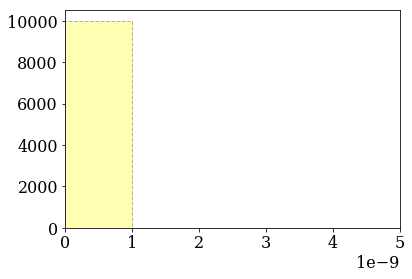

In [17]:
binwidth=0.000000001
pyplot.xlim(0,0.000000005)
bins=numpy.arange(0.,0.000000005, binwidth)
pyplot.hist(x_exp-y_exp,bins,density=False,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'yellow');

Le graphique précédent montre que l'ensemble des valeurs générées concordent exactement, et dans le même ordre. Par exemple les quatre premières valeurs générées par *numpy* et la méthode précédente sont:

In [18]:
print('numpy exponential : ', x_exp[:4])
print('méthode précédente: ', y_exp[:4])

numpy exponential :  [3.18349803 5.02372305 3.69289258 3.14880461]
méthode précédente:  [3.18349803 5.02372305 3.69289258 3.14880461]


Ainsi on remarque bien qu'en prenant la même graine pour les deux méthodes, les résultats sont les mêmes. Les deux méthodes sont donc strictement équivalentes. Il faudrait alors s'intéresser au temps computationnel des algorithmes afin de voir si l'une ou l'autre est préférable à utiliser.

Traçons donc une courbe représentative du temps moyen (sur $N_{tests}=100$) d'exécution de ces deux méthodes pour différentes valeurs $N$ de nombres aléatoires générés.

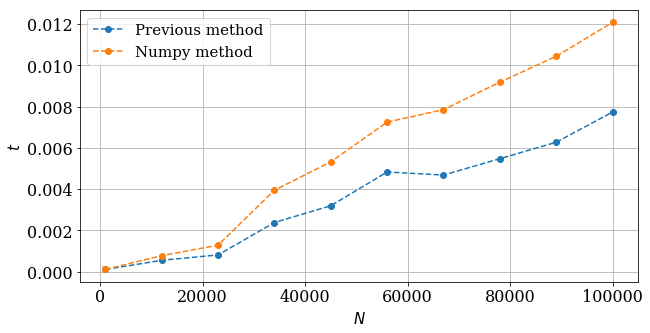

In [19]:
import time

N_tests = 100

ts_previous_method = numpy.zeros(N_tests)
ts_numpy = numpy.zeros(N_tests)


Number_Ns_tested = 10
Ns_random = numpy.linspace(1000,100000, Number_Ns_tested)

ts_previous_method_av = numpy.zeros(Number_Ns_tested)
ts_numpy_av = numpy.zeros(Number_Ns_tested)

for j in range(len(Ns_random)):
    for i in range(N_tests):
        t1_np = time.process_time()
        numpy.random.seed(0)
        x_exp = numpy.random.exponential(scale=beta, size=int(Ns_random[j]))
        t_int = time.process_time()
        numpy.random.seed(0)
        r = numpy.random.random_sample(int(Ns_random[j]))
        y_exp = -1/alpha*numpy.log(1-r)
        t2_method = time.process_time()

        ts_previous_method[i] = t2_method-t_int
        ts_numpy[i] = t_int-t1_np
        
    ts_previous_method_av[j] = numpy.average(ts_previous_method)
    ts_numpy_av[j] = numpy.average(ts_numpy)
    
pyplot.figure(figsize=(10,5))
pyplot.plot(Ns_random,ts_previous_method_av
            , marker='o', ls = '--'
            , label='Previous method'
           )
pyplot.plot(Ns_random,ts_numpy_av
            , marker='o', ls = '--'
            , label='Numpy method'
           )
pyplot.legend(prop={'size':15})
pyplot.xlabel('$N$', size=15)
pyplot.ylabel('$t$', size=15)
pyplot.grid()
pyplot.show()



On peut ainsi voir que la méthode implémentée précédemment est plus efficace que la fonction prévue à cet effet par la bibliothèque *random* de *numpy*, notamment pour un grand nombre de valeurs générées (pour $N$ grand).

Il serait donc préférable intéressant la méthode implémentée plus tôt au lieu de la fonction *numpy.random.exponential* afin de minimiser le temps de calcul.

Réalisons alors une analyse similaire pour la **gaussienne**, avec la fonction de la bibliothèque numpy *numpy.random.normal($\mu$, $\sigma$, size)*.

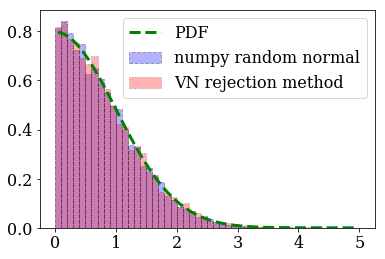

In [20]:
numpy.random.seed(0)

mu = 0.0
sigma = 1
x_norm = numpy.random.normal(mu, sigma, size=2*int(N*acc_ratio))

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(x_norm,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'b', label='numpy random normal');
pyplot.hist(h,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.3, lw=1, color= 'r', label='VN rejection method');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi), ls = '--',lw=3,color='green', label='PDF')

pyplot.legend()
pyplot.show()

On remarque qu'ici, même avec la même graine, les données simulées ne sont pas les mêmes, toutefois dans les deux cas elles collent bien à la PDF souhaitée. 

On peut à nouveau étudier le temps de calcul de ces deux méthodes de générations de variables gaussiennes.

In [21]:
N_tests = 100

ts_NV = numpy.zeros(N_tests)
ts_numpy_normal = numpy.zeros(N_tests)


Number_Ns_tested = 10
Ns_random = numpy.linspace(1000,100000, Number_Ns_tested)

ts_NV_av = numpy.zeros(Number_Ns_tested)
ts_numpy_normal_av = numpy.zeros(Number_Ns_tested)


for j in range(len(Ns_random)):
    for i in range(N_tests):
        t1_NV = time.process_time()
        
        uniform1 = numpy.random.random_sample(int(Ns_random[j]))
        g = numpy.log(1/(1-uniform1))
        p_g_exp = numpy.exp(-g)
        p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)
        uniform2 = numpy.random.random_sample(int(Ns_random[j]))
        condition = uniform2 < p_g_gauss / (1.4*p_g_exp )
        h = numpy.extract(condition,g)    
        
        t2_NV = time.process_time()
        
        acc_ratio = h.size/g.size
        N_norm = Ns_random[j]*acc_ratio
        
        t1_np_norm = time.process_time()

        x_norm = numpy.random.normal(mu, sigma, size=2*int(N_norm))
        
        t2_np_norm = time.process_time()

        ts_NV[i] = t2_NV-t1_NV
        ts_numpy_normal[i] = t2_np_norm-t1_np_norm
        
    ts_NV_av[j] = numpy.average(ts_NV)
    ts_numpy_normal_av[j] = numpy.average(ts_numpy_normal)


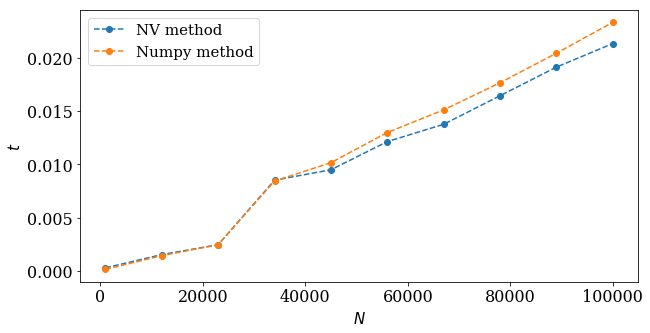

In [22]:
pyplot.figure(figsize=(10,5))
pyplot.plot(Ns_random,ts_NV_av
            , marker='o', ls = '--'
            , label='NV method'
           )
pyplot.plot(Ns_random,ts_numpy_normal_av
            , marker='o', ls = '--'
            , label='Numpy method'
           )
pyplot.legend(prop={'size':15})
pyplot.xlabel('$N$', size=15)
pyplot.ylabel('$t$', size=15)
pyplot.show()

Encore une fois, même si la différence semble moins conséquente, la méthode VN implémentée précédemment semble plus rapide que la fonction de *numpy* pour générer des variables gaussiennes.

**2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.**

Implémentons alors la méthode de Box-Muller pour générer des variables aléatoires gaussiennes. Nous nous baserons sur les explications provenant notamment de https://theclevermachine.wordpress.com/2012/09/11/sampling-from-the-normal-distribution-using-the-box-muller-transform/ - Sampling From the Normal Distribution Using the Box-Muller Transform. 

Il s'agira donc de coder l'algorithme suivant: 
1. Générer deux variables uniforme sur $[0,1]$:  $u_1,u_2 \sim U(0,1)$
2. Transformer ces variables en angles en radian $\theta$ et rayons $r$: $r = \sqrt{-2\log(u_1)}$ , et $\theta = 2\pi u_2$
3. Transformer ces rayons et angles en coordonnées cartésiennes: $x = r \cos(\theta)$ et $y = r \sin(\theta)$
4. Ajuster ces variables aux paramètres gaussiens souhaités: $x=x\sigma+\mu$, et $y=y\sigma+\mu$

Les variables $x$ et $y$ suivent alors une loi de distribution normale $\mathcal{N}(\mu,\sigma)$.

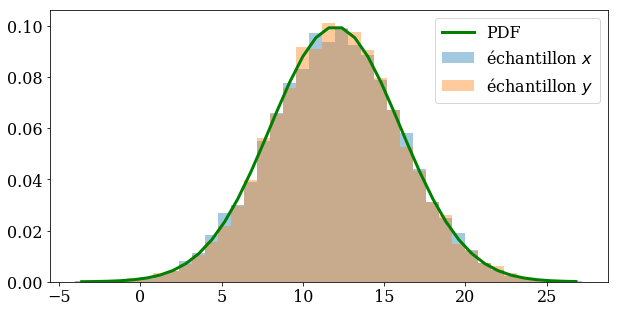

In [25]:
numpy.random.seed(0)

### Implémentation de la méthode de Box Muller 

N = 10000
sigma = 4
mu = 12

#1.
u1 = numpy.random.random_sample(N)
u2 = numpy.random.random_sample(N)
#2.
R = numpy.sqrt(-2*numpy.log(u1))
theta = 2*numpy.pi*u2
#3.
x, y = R*numpy.cos(theta), R*numpy.sin(theta)
#4.
x = x*sigma+mu
y = y*sigma+mu


#Plot the results
fig = pyplot.figure(figsize=(10,5))


binwidth = sigma/5
bins=numpy.arange(mu-4.*sigma,mu+4.*sigma, binwidth)
pyplot.hist(x,bins,density=True, alpha=0.4, label='échantillon $x$');
pyplot.hist(y,bins,density=True, alpha=0.4, label='échantillon $y$')
# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-((xc-mu)/sigma)**2/2.0)/(sigma*numpy.sqrt(2*numpy.pi))
            ,lw=3,color='green', label='PDF')
pyplot.legend()
pyplot.show()


Les variables générées par la méthode BM implémentée montre bien le bon comportement selon l'histogramme précédent.

On peut à nouveau comparer cette méthode avec la méthode de la bibliothèque numpy:

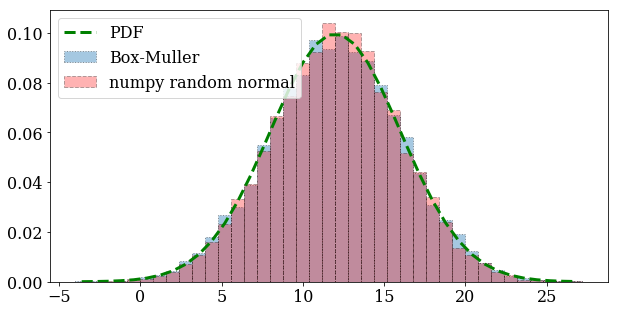

In [26]:
x_norm = numpy.random.normal(mu, sigma, size=N)

# Plots
fig = pyplot.figure(figsize=(10,5))


binwidth = sigma/5
bins=numpy.arange(mu-4.*sigma,mu+4.*sigma, binwidth)
plot_x_BM = pyplot.hist(x,bins,density=True,ls='dotted',edgecolor='k', alpha = 0.4, lw=1, label='Box-Muller');
plot_x_norm = pyplot.hist(x_norm,bins,density=True,ls='--',edgecolor='k', alpha = 0.3, lw=1, color= 'r', label='numpy random normal');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-((xc-mu)/sigma)**2/2.0)/(sigma*numpy.sqrt(2*numpy.pi)), ls = '--',lw=3,color='green', label='PDF')

pyplot.legend()
pyplot.show()

On peut alors étudier la différence du nombre de "coups" par bin entre les deux méthodes.

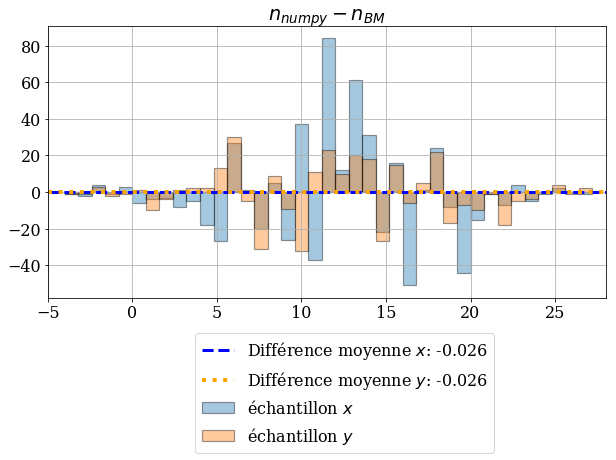

In [32]:
hist_x_norm = numpy.histogram(x_norm, bins=bins, density=False)
H_x_norm = hist_x_norm[0]
hist_x_BM = numpy.histogram(x, bins=bins, density=False)
H_x_BM = hist_x_BM[0]
hist_y_BM = numpy.histogram(y, bins=bins, density=False)
H_y_BM = hist_y_BM[0]

fig = pyplot.figure(figsize=(10,5))

pyplot.bar(bins[:-1]+binwidth/2, 
         height=(H_x_norm-H_x_BM), edgecolor='black', 
         linewidth=1.2, alpha = 0.4, width = binwidth,
          label = 'échantillon $x$') 
diff_x_av = numpy.average(H_x_norm-H_x_BM)
pyplot.plot([-5, 28], [diff_x_av, diff_x_av],
           ls='--', lw=3, color='blue',
           label = 'Différence moyenne $x$: %.3f' %diff_x_av)

pyplot.bar(bins[:-1]+binwidth/2, 
         height=(H_x_norm-H_y_BM), edgecolor='black', 
         linewidth=1.2, alpha = 0.4, width = binwidth,
          label = 'échantillon $y$') 
diff_y_av = numpy.average(H_x_norm-H_y_BM)
pyplot.plot([-5, 28], [diff_y_av, diff_y_av],
           ls=':', lw=4, color='orange',
           label = 'Différence moyenne $y$: %.3f' %diff_y_av)

pyplot.title(r"$n_{numpy}-n_{BM}$")
pyplot.xlim(-5,28)
pyplot.grid()
pyplot.legend(loc='center left', bbox_to_anchor=(0.25, -0.35))
pyplot.show()

Le plot précédent montre la différence de coups comptés par bin entre la fonction *numpy* et la méthode BM. On peut remarquer que cette différence reste négligeable devant le nombre d'évènements générés: pour une différence de 100 évènements, cela ne représente que 1% pour $N=10000$.

On peut également comparer son temps d'exécution à celui des autres méthodes déjà étudiées.

In [33]:
N_tests = 100

ts_NV = numpy.zeros(N_tests)
ts_numpy_normal = numpy.zeros(N_tests)
ts_BM = numpy.zeros(N_tests)

Number_Ns_tested = 10
Ns_random = numpy.linspace(1000,100000, Number_Ns_tested)

ts_NV_av = numpy.zeros(Number_Ns_tested)
ts_numpy_normal_av = numpy.zeros(Number_Ns_tested)
ts_BM_av = numpy.zeros(Number_Ns_tested)


for j in range(len(Ns_random)):
    for i in range(N_tests):
        t1_NV = time.process_time()
        
        uniform1 = numpy.random.random_sample(int(Ns_random[j]))
        g = numpy.log(1/(1-uniform1))
        p_g_exp = numpy.exp(-g)
        p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)
        uniform2 = numpy.random.random_sample(int(Ns_random[j]))
        condition = uniform2 < p_g_gauss / (1.4*p_g_exp )
        h = numpy.extract(condition,g)    
        
        t2_NV = time.process_time()
        
        acc_ratio = h.size/g.size
        N_norm = Ns_random[j]*acc_ratio
        
        t1_np_norm = time.process_time()

        x_norm = numpy.random.normal(mu, sigma, size=2*int(N_norm))
        
        t2_np_norm = time.process_time()
        
        t1_BM = time.process_time()
        
        u1 = numpy.random.random_sample(int(Ns_random[j]))
        u2 = numpy.random.random_sample(int(Ns_random[j]))

        R = numpy.sqrt(-2*numpy.log(u1))
        theta = 2*numpy.pi*u2

        x, y = R*numpy.cos(theta), R*numpy.sin(theta)
        x = x*sigma+mu
        y = y*sigma+mu
        
        t2_BM = time.process_time()
        

        ts_NV[i] = t2_NV-t1_NV
        ts_numpy_normal[i] = t2_np_norm-t1_np_norm
        ts_BM[i] = t2_BM - t1_BM
        
    ts_NV_av[j] = numpy.average(ts_NV)
    ts_numpy_normal_av[j] = numpy.average(ts_numpy_normal)
    ts_BM_av[j] = numpy.average(ts_BM)


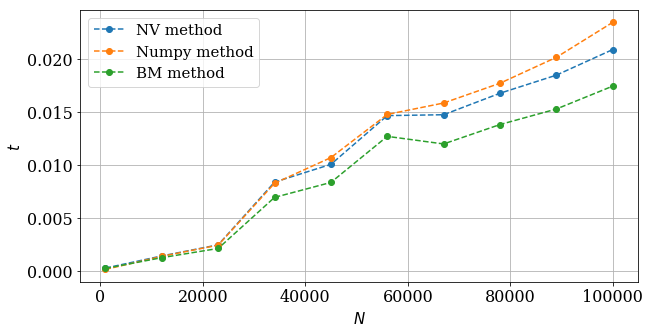

In [34]:
pyplot.figure(figsize=(10,5))
pyplot.plot(Ns_random,ts_NV_av
            , marker='o', ls = '--'
            , label='NV method'
           )
pyplot.plot(Ns_random,ts_numpy_normal_av
            , marker='o', ls = '--'
            , label='Numpy method'
           )
pyplot.plot(Ns_random,ts_BM_av
            , marker='o', ls = '--'
            , label='BM method'
           )
pyplot.legend(prop={'size':15})
pyplot.xlabel('$N$', size=15)
pyplot.ylabel('$t$', size=15)
pyplot.grid()
pyplot.show()

La méthode de Box-Muller semble encore plus efficace que les méthodes précédentes, tout en permettant de générer deux séquences de variables aléatoires gaussiennes simultanément. Son utilisation serait donc d'autant plus intéressantes.

In [2]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())